In [1]:
!pip install sparse_lmm


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np

clinical_data = pd.read_csv('TCGA dataset/TCGA_Bile_Duct_Cancer_(CHOL)/TCGA.CHOL.sampleMap_CHOL_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv('TCGA dataset/TCGA_Bile_Duct_Cancer_(CHOL)/TCGA.CHOL.sampleMap_HiSeqV2_PANCAN.gz', sep='\t', index_col=0)

In [3]:
clinical_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,age_at_initial_pathologic_diagnosis,albumin_result_lower_limit,albumin_result_specified_value,...,_GENOMIC_ID_TCGA_CHOL_miRNA_HiSeq,_GENOMIC_ID_TCGA_CHOL_gistic2thd,_GENOMIC_ID_TCGA_CHOL_gistic2,_GENOMIC_ID_TCGA_CHOL_PDMRNAseqCNV,_GENOMIC_ID_TCGA_CHOL_exp_HiSeqV2_exon,_GENOMIC_ID_data/public/TCGA/CHOL/miRNA_HiSeq_gene,_GENOMIC_ID_TCGA_CHOL_mutation_ucsc_maf_gene,_GENOMIC_ID_TCGA_CHOL_PDMRNAseq,_GENOMIC_ID_TCGA_CHOL_exp_HiSeqV2_percentile,_GENOMIC_ID_TCGA_CHOL_RPPA
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3X-AAV9-01,TCGA-3X-AAV9-01,TCGA-3X-AAV9,TCGA Bile Duct Cancer (CHOL),cholangiocarcinoma,Bile duct,NaN,NaN,72,3.3,2.7,...,TCGA-3X-AAV9-01,TCGA-3X-AAV9-01A-72D-A416-01,TCGA-3X-AAV9-01A-72D-A416-01,TCGA-3X-AAV9-01,59012a78-0e8f-4b99-af97-0dbb1d3d0513,TCGA-3X-AAV9-01,TCGA-3X-AAV9-01A-72D-A417-09,TCGA-3X-AAV9-01,59012a78-0e8f-4b99-af97-0dbb1d3d0513,AEB48F2C-59ED-45B1-BC10-1875590E7C47
TCGA-3X-AAVA-01,TCGA-3X-AAVA-01,TCGA-3X-AAVA,TCGA Bile Duct Cancer (CHOL),cholangiocarcinoma,Bile duct,NaN,NaN,50,NaN,NaN,...,TCGA-3X-AAVA-01,TCGA-3X-AAVA-01A-11D-A416-01,TCGA-3X-AAVA-01A-11D-A416-01,TCGA-3X-AAVA-01,6a8ffc5d-444e-4864-bafd-ddf1ef900ef0,TCGA-3X-AAVA-01,TCGA-3X-AAVA-01A-11D-A417-09,TCGA-3X-AAVA-01,6a8ffc5d-444e-4864-bafd-ddf1ef900ef0,51164357-1D61-4499-82ED-169A9DA8A4C0
TCGA-3X-AAVB-01,TCGA-3X-AAVB-01,TCGA-3X-AAVB,TCGA Bile Duct Cancer (CHOL),cholangiocarcinoma,Bile duct,NaN,NaN,70,3.3,4.3,...,TCGA-3X-AAVB-01,TCGA-3X-AAVB-01A-31D-A416-01,TCGA-3X-AAVB-01A-31D-A416-01,TCGA-3X-AAVB-01,88336d42-a31c-448f-a077-2608786c80fe,TCGA-3X-AAVB-01,TCGA-3X-AAVB-01A-31D-A417-09,TCGA-3X-AAVB-01,88336d42-a31c-448f-a077-2608786c80fe,NaN
TCGA-3X-AAVC-01,TCGA-3X-AAVC-01,TCGA-3X-AAVC,TCGA Bile Duct Cancer (CHOL),cholangiocarcinoma,Bile duct,NaN,NaN,72,3.3,2.4,...,TCGA-3X-AAVC-01,TCGA-3X-AAVC-01A-21D-A416-01,TCGA-3X-AAVC-01A-21D-A416-01,TCGA-3X-AAVC-01,8c8d5e98-023b-4496-a237-2632c609f627,TCGA-3X-AAVC-01,TCGA-3X-AAVC-01A-21D-A417-09,TCGA-3X-AAVC-01,8c8d5e98-023b-4496-a237-2632c609f627,D423C8E5-02C2-445A-BA13-C74C0012E2B4
TCGA-3X-AAVE-01,TCGA-3X-AAVE-01,TCGA-3X-AAVE,TCGA Bile Duct Cancer (CHOL),cholangiocarcinoma,Bile duct,NaN,NaN,60,3.3,4.0,...,TCGA-3X-AAVE-01,TCGA-3X-AAVE-01A-11D-A416-01,TCGA-3X-AAVE-01A-11D-A416-01,TCGA-3X-AAVE-01,c49a7f2a-f7ef-419d-829a-0b3a9f915aad,TCGA-3X-AAVE-01,TCGA-3X-AAVE-01A-11D-A417-09,TCGA-3X-AAVE-01,c49a7f2a-f7ef-419d-829a-0b3a9f915aad,NaN


In [4]:
# Display gene dataset
gene_data.head()

,TCGA-4G-AAZT-01,TCGA-W5-AA2R-11,TCGA-W5-AA36-01,TCGA-W5-AA2U-01,TCGA-ZU-A8S4-11,TCGA-W5-AA30-11,TCGA-W5-AA2T-01,TCGA-W5-AA2I-01,TCGA-W5-AA2H-01,TCGA-3X-AAVA-01,...,TCGA-ZH-A8Y2-01,TCGA-W5-AA33-01,TCGA-4G-AAZO-01,TCGA-3X-AAVE-01,TCGA-W5-AA2W-01,TCGA-W5-AA2Z-01,TCGA-ZD-A8I3-01,TCGA-3X-AAVC-01,TCGA-W5-AA31-01,TCGA-W5-AA39-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,0.318608,1.392808,0.823908,0.631008,1.526508,2.113908,0.348508,0.091908,-1.671692,0.856308,...,0.518108,0.068608,0.168608,0.401008,1.511808,0.491008,0.500708,0.241908,0.466608,1.944908
HIF3A,0.005374,-0.873826,-4.106826,-1.027726,0.085474,0.475574,1.838174,0.228874,2.306874,-1.619826,...,0.712174,-1.233926,-2.577826,-1.262126,-3.907726,1.168774,1.910674,2.165274,3.640074,2.114574
RNF17,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,...,0.503465,-0.531035,-0.531035,-0.531035,0.515765,1.159265,-0.531035,-0.531035,-0.076535,-0.531035
RNF10,-0.091772,0.138528,0.405528,-0.939772,-0.211972,-0.166372,-0.211972,0.141628,0.118428,0.298528,...,-0.549572,-0.393072,0.315128,0.221328,-0.201172,0.294028,-0.256072,-0.142172,0.366928,0.483328
RNF11,-0.363778,0.150622,-1.582778,-0.331178,0.343522,-0.062778,-0.314878,-0.897878,-1.524178,-0.868478,...,0.364422,-0.412278,-0.054378,0.254422,-1.168478,0.172922,-0.920378,-0.408378,0.252222,-0.084278


In [5]:
gene_fullname = 'KRAS gene'
gene = 'kras'
condition = 'obesity'
condition_col = 'initial_weight'
trait = 'Bile Duct Cancer'

# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_data)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')
gene_data.T

The clinical dataset has 110 features, and the gene dataset includes 20530 genes


sample,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
TCGA-4G-AAZT-01,0.318608,0.005374,-0.531035,-0.091772,-0.363778,-0.56731,0.551106,0.432954,-0.423399,-0.227772,...,-0.748878,-1.587117,0.655767,-1.28139,-0.105877,0.753414,0.338773,0.377305,1.908767,0.434388
TCGA-W5-AA2R-11,1.392808,-0.873826,-0.531035,0.138528,0.150622,0.05119,-0.947294,-2.319946,-0.423399,2.397528,...,-0.748878,1.802583,-0.845033,-1.28139,-1.652877,-1.449086,-0.799327,1.516505,0.507267,0.244688
TCGA-W5-AA36-01,0.823908,-4.106826,-0.531035,0.405528,-1.582778,-1.08431,1.344506,0.767754,-0.423399,1.683128,...,-0.748878,2.245683,0.422667,-1.28139,-0.541877,0.692314,0.836973,0.989005,-4.869233,0.878988
TCGA-W5-AA2U-01,0.631008,-1.027726,-0.531035,-0.939772,-0.331178,-0.09981,0.538806,-0.449846,-0.423399,2.119328,...,-0.748878,0.872583,-0.370033,-1.28139,0.573823,-0.038386,0.615473,0.998305,2.685167,0.455088
TCGA-ZU-A8S4-11,1.526508,0.085474,-0.531035,-0.211972,0.343522,-0.01481,-1.114094,-1.157846,-0.423399,2.877528,...,0.311922,1.097783,0.498567,-1.28139,-1.682677,-1.454186,0.319273,1.863205,0.498567,0.639788
TCGA-W5-AA30-11,2.113908,0.475574,-0.531035,-0.166372,-0.062778,0.31449,-0.825494,0.813054,-0.423399,2.356628,...,0.920922,2.854183,-0.033333,-1.28139,-0.709977,-0.343886,0.119473,1.664005,2.191667,0.115988
TCGA-W5-AA2T-01,0.348508,1.838174,-0.531035,-0.211972,-0.314878,-0.94111,0.774806,-1.055946,1.351101,2.102228,...,-0.748878,-1.587117,-1.706733,-1.28139,0.741923,0.191714,-0.105327,0.312405,-4.548433,0.399488
TCGA-W5-AA2I-01,0.091908,0.228874,-0.531035,0.141628,-0.897878,-0.34411,1.112206,-3.583646,-0.423399,1.510128,...,-0.748878,1.450483,-0.527633,-1.28139,1.055223,-0.994286,-1.358027,1.209305,-3.523833,0.128388
TCGA-W5-AA2H-01,-1.671692,2.306874,-0.531035,0.118428,-1.524178,-1.06611,-0.682794,3.652154,0.745501,-2.331572,...,-0.748878,2.025983,3.057867,-1.28139,-1.117377,0.014414,0.284273,1.364105,3.397467,-0.528112
TCGA-3X-AAVA-01,0.856308,-1.619826,-0.531035,0.298528,-0.868478,0.11769,1.499206,0.130454,-0.423399,5.244728,...,-0.096478,-0.487117,-0.042833,-0.62899,0.006023,-0.671586,0.966673,1.155905,0.364867,0.389788


In [6]:
# Merge clinical_data and gene_data on their indices - sample_ID, corresponding to each person
merged_data = clinical_data.join(gene_data.T, rsuffix='_gd')

merged_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,age_at_initial_pathologic_diagnosis,albumin_result_lower_limit,albumin_result_specified_value,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3X-AAV9-01,TCGA-3X-AAV9-01,TCGA-3X-AAV9,TCGA Bile Duct Cancer (CHOL),cholangiocarcinoma,Bile duct,NaN,NaN,72,3.3,2.7,...,-0.748878,2.777283,0.834567,0.61461,-0.174277,1.258014,1.378873,0.150705,3.910967,0.959988
TCGA-3X-AAVA-01,TCGA-3X-AAVA-01,TCGA-3X-AAVA,TCGA Bile Duct Cancer (CHOL),cholangiocarcinoma,Bile duct,NaN,NaN,50,NaN,NaN,...,-0.096478,-0.487117,-0.042833,-0.62899,0.006023,-0.671586,0.966673,1.155905,0.364867,0.389788
TCGA-3X-AAVB-01,TCGA-3X-AAVB-01,TCGA-3X-AAVB,TCGA Bile Duct Cancer (CHOL),cholangiocarcinoma,Bile duct,NaN,NaN,70,3.3,4.3,...,-0.748878,0.702583,0.417067,3.72391,-0.252277,1.668814,0.061273,-0.264895,-0.706533,0.033388
TCGA-3X-AAVC-01,TCGA-3X-AAVC-01,TCGA-3X-AAVC,TCGA Bile Duct Cancer (CHOL),cholangiocarcinoma,Bile duct,NaN,NaN,72,3.3,2.4,...,-0.748878,-1.587117,-0.357733,2.47731,-0.326777,-0.755186,0.829273,1.535705,-0.194933,0.655888
TCGA-3X-AAVE-01,TCGA-3X-AAVE-01,TCGA-3X-AAVE,TCGA Bile Duct Cancer (CHOL),cholangiocarcinoma,Bile duct,NaN,NaN,60,3.3,4.0,...,-0.748878,3.567183,0.800067,-1.28139,0.492123,0.032114,-0.047127,0.593205,1.645367,0.278188


In [7]:
# Only select relevant columns
input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
merged_data = merged_data[input_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,initial_weight,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3X-AAV9-01,740.0,-0.034092,3.596974,-0.531035,0.266528,-0.005678,-0.01181,-0.280994,1.530154,-0.423399,...,-0.748878,2.777283,0.834567,0.61461,-0.174277,1.258014,1.378873,0.150705,3.910967,0.959988
TCGA-3X-AAVA-01,480.0,0.856308,-1.619826,-0.531035,0.298528,-0.868478,0.11769,1.499206,0.130454,-0.423399,...,-0.096478,-0.487117,-0.042833,-0.62899,0.006023,-0.671586,0.966673,1.155905,0.364867,0.389788
TCGA-3X-AAVB-01,420.0,0.226908,-0.639626,0.448965,-0.344772,-0.242478,-0.16491,-0.092294,0.190654,-0.423399,...,-0.748878,0.702583,0.417067,3.72391,-0.252277,1.668814,0.061273,-0.264895,-0.706533,0.033388
TCGA-3X-AAVC-01,230.0,0.241908,2.165274,-0.531035,-0.142172,-0.408378,0.48889,-0.531094,0.213454,0.204201,...,-0.748878,-1.587117,-0.357733,2.47731,-0.326777,-0.755186,0.829273,1.535705,-0.194933,0.655888
TCGA-3X-AAVE-01,0.0,0.401008,-1.262126,-0.531035,0.221328,0.254422,0.22079,0.694406,-0.827646,0.177401,...,-0.748878,3.567183,0.800067,-1.28139,0.492123,0.032114,-0.047127,0.593205,1.645367,0.278188


In [8]:

def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])

    if 1 <= last_two_digits <= 9:
        return 1
    elif 10 <= last_two_digits <= 19:
        return 0
    else:
        return -1

# Use the apply function to add the trait column to merged_data
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()

,initial_weight,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Bile Duct Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3X-AAV9-01,740.0,-0.034092,3.596974,-0.531035,0.266528,-0.005678,-0.01181,-0.280994,1.530154,-0.423399,...,2.777283,0.834567,0.61461,-0.174277,1.258014,1.378873,0.150705,3.910967,0.959988,1
TCGA-3X-AAVA-01,480.0,0.856308,-1.619826,-0.531035,0.298528,-0.868478,0.11769,1.499206,0.130454,-0.423399,...,-0.487117,-0.042833,-0.62899,0.006023,-0.671586,0.966673,1.155905,0.364867,0.389788,1
TCGA-3X-AAVB-01,420.0,0.226908,-0.639626,0.448965,-0.344772,-0.242478,-0.16491,-0.092294,0.190654,-0.423399,...,0.702583,0.417067,3.72391,-0.252277,1.668814,0.061273,-0.264895,-0.706533,0.033388,1
TCGA-3X-AAVC-01,230.0,0.241908,2.165274,-0.531035,-0.142172,-0.408378,0.48889,-0.531094,0.213454,0.204201,...,-1.587117,-0.357733,2.47731,-0.326777,-0.755186,0.829273,1.535705,-0.194933,0.655888,1
TCGA-3X-AAVE-01,0.0,0.401008,-1.262126,-0.531035,0.221328,0.254422,0.22079,0.694406,-0.827646,0.177401,...,3.567183,0.800067,-1.28139,0.492123,0.032114,-0.047127,0.593205,1.645367,0.278188,1


In [9]:
input_cols = merged_data.columns.tolist()
gene_list = [col for col in input_cols if gene in col.lower()]

In [10]:
print(list(merged_data.columns))
print(len(merged_data.columns))

['initial_weight', 'ARHGEF10L', 'HIF3A', 'RNF17', 'RNF10', 'RNF11', 'RNF13', 'GTF2IP1', 'REM1', 'MTVR2', 'RTN4RL2', 'C16orf13', 'C16orf11', 'FGFR1OP2', 'TSKS', 'ATRX', 'PMM2', 'LOC100272146', 'ASS1', 'NCBP1', 'ZNF709', 'ZNF708', 'RBM14', 'NCBP2', 'DISC1', 'CAMK1', 'RPL37', 'SPR', 'ZNF700', 'ZNF707', 'CAMK4', 'ZNF704', 'LOC339240', 'GOLGA6B', 'RNF115', 'RNF112', 'ZC3H14', 'SPN', 'HMGCLL1', 'NACAP1', 'LRRTM1', 'GRIN1', 'RBMY1A3P', 'DHX8', 'DHX9', 'LOC441204', 'TCOF1', 'LRRTM3', 'NUP98', 'XPC', 'SLC12A2', 'GRINA', 'LRRTM2', 'NUP93', 'HAP1', 'KLRA1', 'CAMKV', 'SPPL3', 'GOLIM4', 'ZNF646', 'OPA3', 'OPA1', 'RHEB', 'RAB40C', 'RAB40B', 'RAB40A', 'COL7A1', 'MDP1', 'GTSE1', 'FAM183A', 'ARFRP1', 'OVCH1', 'FAM183B', 'PSAP', 'KIAA0831', 'SPPL2A', 'SLC46A1', 'TGFBR2', 'ITGA8', 'ITGA9', 'STK40', 'MYO3B', 'ATP2A1', 'ATP2A2', 'ATP2A3', 'ITGA1', 'ITGA2', 'ITGA3', 'ITGA4', 'ITGA5', 'ITGA6', 'ITGA7', 'TRHR', 'LOC100132288', 'DENND4A', 'DENND4B', 'DENND4C', 'SWAP70', 'RARRES1', 'LOC100132287', 'PHLDA3', 'PH

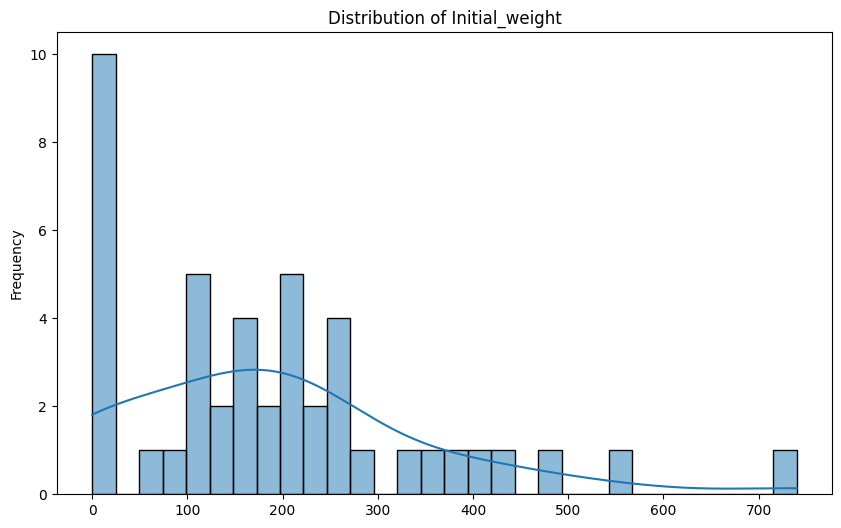

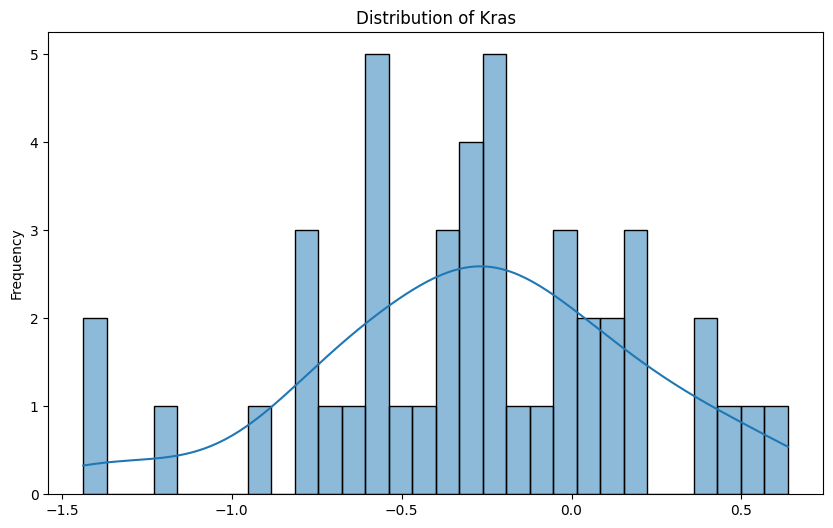

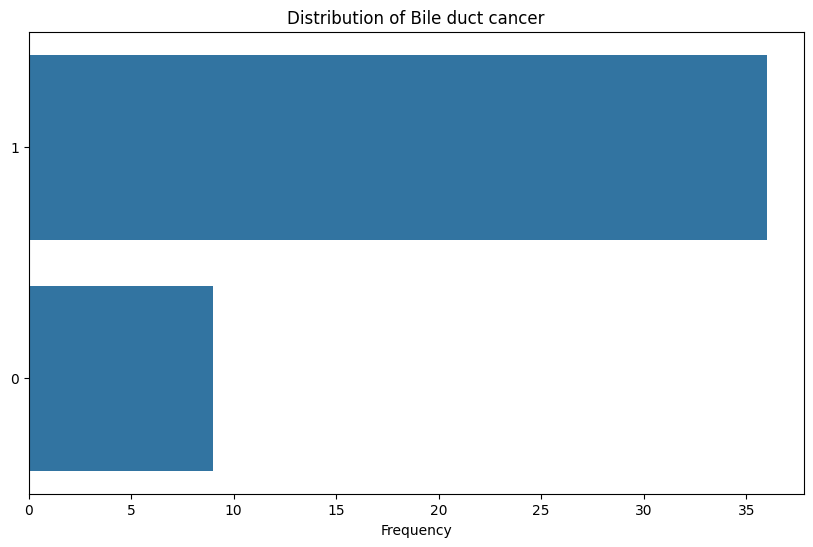

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)

# Sample usage:
analyze_distributions(merged_data, numerical_columns=[condition_col, *gene_list], categorical_columns=[trait])

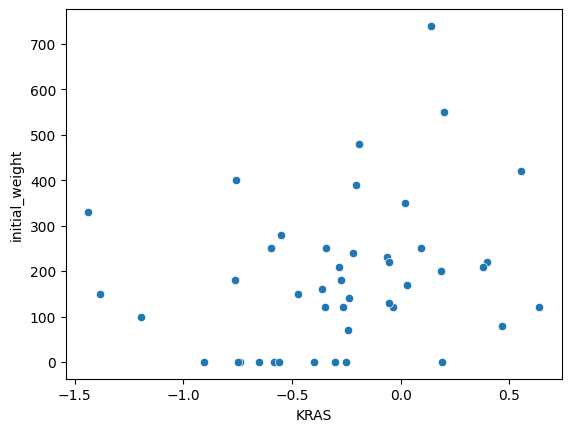

In [13]:
sns.scatterplot(data=merged_data, x='KRAS', y=condition_col)
plt.show()

In [14]:
# Convert "day_to_birth" to age in years
merged_data[condition_col] = (- merged_data[condition_col] / 365.25).astype(int)
merged_data = merged_data.rename(columns={condition_col: condition})
input_cols = merged_data.columns.tolist()

merged_data.head()

,obesity,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Bile Duct Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3X-AAV9-01,-2,-0.034092,3.596974,-0.531035,0.266528,-0.005678,-0.01181,-0.280994,1.530154,-0.423399,...,2.777283,0.834567,0.61461,-0.174277,1.258014,1.378873,0.150705,3.910967,0.959988,1
TCGA-3X-AAVA-01,-1,0.856308,-1.619826,-0.531035,0.298528,-0.868478,0.11769,1.499206,0.130454,-0.423399,...,-0.487117,-0.042833,-0.62899,0.006023,-0.671586,0.966673,1.155905,0.364867,0.389788,1
TCGA-3X-AAVB-01,-1,0.226908,-0.639626,0.448965,-0.344772,-0.242478,-0.16491,-0.092294,0.190654,-0.423399,...,0.702583,0.417067,3.72391,-0.252277,1.668814,0.061273,-0.264895,-0.706533,0.033388,1
TCGA-3X-AAVC-01,0,0.241908,2.165274,-0.531035,-0.142172,-0.408378,0.48889,-0.531094,0.213454,0.204201,...,-1.587117,-0.357733,2.47731,-0.326777,-0.755186,0.829273,1.535705,-0.194933,0.655888,1
TCGA-3X-AAVE-01,0,0.401008,-1.262126,-0.531035,0.221328,0.254422,0.22079,0.694406,-0.827646,0.177401,...,3.567183,0.800067,-1.28139,0.492123,0.032114,-0.047127,0.593205,1.645367,0.278188,1


In [15]:
import pandas as pd
from sparse_lmm import VariableSelection

# Select relevant columns and convert to numpy array
data_array = merged_data.values

# Normalize data
X = data_array
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
zero_std_columns = np.where(std == 0)[0]
X = (X - mean) / std
X[:, zero_std_columns] = 0

y = merged_data[trait].values

# Implementing k-fold cross-validation
def cross_validation(X, y, k=5):
    # Shuffle data
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X_shuffled[train_indices], X_shuffled[test_indices]
        y_train, y_test = y_shuffled[train_indices], y_shuffled[test_indices]

        # Use the precision_lasso package for regression
        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)

        # Turn the predictions into binary values using a threshold of 0.5
        binary_predictions = (predictions > 0.5).astype(int)

        # Calculate accuracy for this fold
        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies)

print(cross_validation(data_array, y))

C:\Users\Bobibob\AppData\Local\Temp\ipykernel_23892\2284219672.py:12: RuntimeWarning: invalid value encountered in divide
  X = (X - mean) / std
C:\Users\Bobibob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sparse_lmm\helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)
C:\Users\Bobibob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sparse_lmm\VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)


0.6246913580246913


In [16]:
# Conduct regression on the whole dataset
# Instantiate the VariableSelection class
var_select = VariableSelection()

# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()

In [17]:
# Print regression result

gene_result = []
condition_result = []

# Extract information related to the regressors
for var, coef, nlogp in zip(input_cols, coefficients, nlog_p_values):
    if gene in var.lower():
        gene_result.append((var, coef, np.exp(-nlogp)))
    if condition == var.lower():
        condition_result.append((var, coef, np.exp(-nlogp)))

regression_report = "Regression Results:\n\n"
regression_report += f"For {gene}:\n"
for variable_name, coefficient, p_value in gene_result:
    regression_report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"

regression_report += f"\nFor {condition}:\n"
for variable_name, coefficient, p_value in condition_result:
    regression_report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"

print(regression_report)

Regression Results:

For kras:
KRAS: Coefficient = 0.015531048694948469, p-value = 0.5735642701464942

For obesity:
obesity: Coefficient = -0.00026217853116944405, p-value = 0.9911633600341787



In [18]:
# Generate hypothesis text

hypotheses_text = f'Hypothesis\n\n'
hypotheses_text += f'For the question "What is the relationship between {gene_fullname} and {trait} when considering the influence of {condition}?", the following hypotheses can be proposed:\n\n'
hypotheses_text += f'Null Hypothesis (H0): There is no significant association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'
hypotheses_text += f'Alternative Hypothesis (H1): There is an association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'

print(hypotheses_text)

Hypothesis

For the question "What is the relationship between KRAS gene and Bile Duct Cancer when considering the influence of obesity?", the following hypotheses can be proposed:

Null Hypothesis (H0): There is no significant association between the expression of the KRAS gene and Bile Duct Cancer when considering the influence of obesity.

Alternative Hypothesis (H1): There is an association between the expression of the KRAS gene and Bile Duct Cancer when considering the influence of obesity.




In [19]:
# Interpretation of Regression Coefficients

threshold = 0.05
def interpret_coefficient(variable_name, coefficient, p_value, significance_level=0.05):
    interpretation = f"Variable: {variable_name}\n"

    if coefficient > 0:
        interpretation += "Coefficient is positive, "
    elif coefficient < 0:
        interpretation += "Coefficient is negative, "
    else:
        interpretation += "Coefficient is zero, "

    if p_value < threshold:
        interpretation += f"and it is statistically significant (p-value < {threshold}).\n\n"
    else:
        interpretation += f"and it is not statistically significant (p-value >= {threshold}).\n\n"

    return interpretation

# Create a report to interpret coefficients and p-values for all variables
interpretation_coefficient_report = "Interpretation of Regression Coefficients:\n\n"

for variable_name, coefficient, p_value in gene_result + condition_result:
    interpretation_coefficient_report += interpret_coefficient(variable_name, coefficient, p_value, threshold)

print(interpretation_coefficient_report)

Interpretation of Regression Coefficients:

Variable: KRAS
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: obesity
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).




In [20]:
# Hypothesis Confirmation and Conclusion

# Create a function to determine if H0 or H1 is confirmed
def confirm_hypothesis(coefficient, p_value, variable_name, significance_level=0.05):
    if p_value >= significance_level:
        return f"H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the {variable_name} gene and {trait} when considering the influence of {condition}."
    elif coefficient != 0 and p_value < significance_level:
        return f"H1 is confirmed: There is an association between the expression of the {variable_name} and {trait} when considering the influence of {condition}.\n\n"

hypothesis_confirmation_report = "Hypothesis Confirmation and Conclusion:\n\n"

for variable_name, coefficient, p_value in gene_result:
    confirmation = confirm_hypothesis(coefficient, p_value, variable_name, threshold)
    hypothesis_confirmation_report += f"Variable: {variable_name}\n"
    hypothesis_confirmation_report += f"Conclusion: {confirmation}\n\n"

print(hypothesis_confirmation_report)

Hypothesis Confirmation and Conclusion:

Variable: KRAS
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the KRAS gene and Bile Duct Cancer when considering the influence of obesity.


